### Import all necessary library

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from random import randint
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist
from keras import Input, Model

In [2]:
(X_train, y_train), (X_test,y_test) = mnist.load_data()
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
print(X_train.max())
print(X_train.min())
X_train = X_train/255.0
X_test = X_test/255.0
print(X_train.max())
print(X_train.min())

255
0
1.0
0.0


In [4]:
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)
X_train.shape

(60000, 28, 28, 1)

In [5]:
def build_network(input_image):
      
    # Building the encoder of the Auto-encoder
    x = Conv2D(16, (3, 3), activation ='relu', padding ='same')(input_image)
    x = MaxPooling2D((2, 2), padding ='same')(x)
    x = Conv2D(8, (3, 3), activation ='relu', padding ='same')(x)
    x = MaxPooling2D((2, 2), padding ='same')(x)
    x = Conv2D(8, (3, 3), activation ='relu', padding ='same')(x)
    encoded_layer = MaxPooling2D((2, 2), padding ='same')(x)
      
    # Building the decoder of the Auto-encoder
    x = Conv2D(8, (3, 3), activation ='relu', padding ='same')(encoded_layer)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(8, (3, 3), activation ='relu', padding ='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation ='relu')(x)
    x = UpSampling2D((2, 2))(x)
    decoded_layer = Conv2D(1, (3, 3), activation ='sigmoid', padding ='same')(x)
      
    return decoded_layer

In [6]:
input_image = Input(shape =(28, 28, 1))

In [7]:
decoded_layer = build_network(input_image)

In [8]:
autoencoder = Model(input_image, decoded_layer)
autoencoder.compile(optimizer ='adam', loss ='binary_crossentropy')

In [9]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584   

In [10]:
history = autoencoder.fit(X_train,X_train,epochs=10,batch_size=256, shuffle=True, validation_data=(X_test,X_test))

Epoch 1/10
235/235 [==============================] - 51s 214ms/step - loss: 0.2801 - val_loss: 0.1704
Epoch 2/10
235/235 [==============================] - 51s 216ms/step - loss: 0.1545 - val_loss: 0.1419
Epoch 3/10
235/235 [==============================] - 47s 202ms/step - loss: 0.1358 - val_loss: 0.1290
Epoch 4/10
235/235 [==============================] - 50s 213ms/step - loss: 0.1265 - val_loss: 0.1220
Epoch 5/10
235/235 [==============================] - 48s 205ms/step - loss: 0.1212 - val_loss: 0.1178
Epoch 6/10
235/235 [==============================] - 47s 201ms/step - loss: 0.1175 - val_loss: 0.1150
Epoch 7/10
235/235 [==============================] - 44s 188ms/step - loss: 0.1147 - val_loss: 0.1121
Epoch 8/10
235/235 [==============================] - 45s 192ms/step - loss: 0.1125 - val_loss: 0.1107
Epoch 9/10
235/235 [==============================] - 47s 202ms/step - loss: 0.1107 - val_loss: 0.1091
Epoch 10/10
235/235 [==============================] - 46s 196ms/step - l

In [13]:
print("Training Accuracy")
print(autoencoder.evaluate(X_train,X_train))
print("Test accuracy")
print(autoencoder.evaluate(X_test,X_test))

Training Accuracy
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1086
0.10860859602689743
Test accuracy
313/313 [==============================] - 4s 14ms/step - loss: 0.1073
0.10733791440725327


In [14]:
pred = autoencoder.predict(X_test)

313/313 [==============================] - 5s 14ms/step


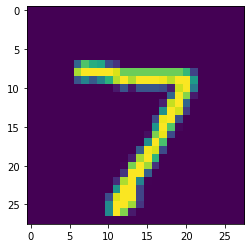

In [15]:
plt.imshow(X_test[0])

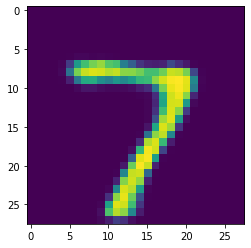

In [16]:
plt.imshow(pred[0])

In [17]:
def visualize(model, X_test):
      
    # Reconstructing the encoded images
    reconstructed_images = model.predict(X_test)
      
    plt.figure(figsize =(20, 4))
    for i in range(1, 11):
          
        # Generating a random to get random results
        rand_num = randint(0, 10001)
      
        # To display the original image
        ax = plt.subplot(2, 10, i)
        plt.imshow(X_test[rand_num].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
  
        # To display the reconstructed image
        ax = plt.subplot(2, 10, i + 10)
        plt.imshow(reconstructed_images[rand_num].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
          
    # Displaying the plot
    plt.show()

313/313 [==============================] - 4s 14ms/step


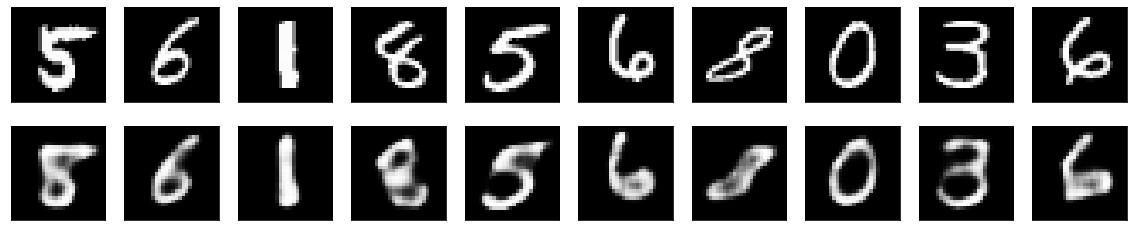

In [20]:
visualize(autoencoder, X_test)